In [1]:
# ========================
# 📌 Install Required Packages
# ========================
# Run this once at the top of your notebook

!pip install nltk spacy gensim scikit-learn wordcloud matplotlib
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Q1: Text Reading and Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

# download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# input text
text = """Natural Language Processing (NLP) is a sub-field of Artificial Intelligence.
It deals with the interaction between computers and humans using natural language."""

print("Original Text:\n", text)

# lowercase
text = text.lower()

# remove non-alphabetical chars
text = re.sub(r'[^a-z\s]', '', text)

# word tokenization
words = word_tokenize(text)

# stopword removal
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

# sentence tokenization
sentences = sent_tokenize(text)

print("\nCleaned Text:", " ".join(filtered_words))
print("\nSentence Tokens:", sentences)
print("\nWord Tokens:", filtered_words)


Original Text:
 Natural Language Processing (NLP) is a sub-field of Artificial Intelligence.
It deals with the interaction between computers and humans using natural language.

Cleaned Text: natural language processing nlp subfield artificial intelligence deals interaction computers humans using natural language

Sentence Tokens: ['natural language processing nlp is a subfield of artificial intelligence\nit deals with the interaction between computers and humans using natural language']

Word Tokens: ['natural', 'language', 'processing', 'nlp', 'subfield', 'artificial', 'intelligence', 'deals', 'interaction', 'computers', 'humans', 'using', 'natural', 'language']


[nltk_data] Downloading package punkt to /Users/sunill/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunill/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Q2: Text Normalization and Entity Extraction
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy

# downloads for lemmatizer + POS
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# tokens for demo
tokens = ['running', 'studies', 'better', 'computers', 'humans', 'processing']

# Porter Stemmer
stemmer = PorterStemmer()
stems = [stemmer.stem(w) for w in tokens]
print("Porter Stemmer:", stems)

# WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(w) for w in tokens]
print("WordNet Lemmas:", lemmas)

# spaCy Lemmatizer
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(tokens))
spacy_lemmas = [token.lemma_ for token in doc]
print("spaCy Lemmas:", spacy_lemmas)

# POS tagging
pos_tags = nltk.pos_tag(tokens)
print("\nPOS Tags:", pos_tags)

# Named Entity Recognition
text = "Google was founded in 1998 and is based in Mountain View, California."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, "->", ent.label_)

# Dependency Visualization (works only in Jupyter, not plain .py)
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True)


[nltk_data] Downloading package wordnet to /Users/sunill/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sunill/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sunill/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Porter Stemmer: ['run', 'studi', 'better', 'comput', 'human', 'process']
WordNet Lemmas: ['running', 'study', 'better', 'computer', 'human', 'processing']
spaCy Lemmas: ['run', 'study', 'well', 'computer', 'human', 'process']

POS Tags: [('running', 'VBG'), ('studies', 'NNS'), ('better', 'RBR'), ('computers', 'NNS'), ('humans', 'NNS'), ('processing', 'VBG')]
Google -> ORG
1998 -> DATE
Mountain View -> GPE
California -> GPE


Count Vectorizer Vocabulary: ['ai' 'fun' 'in' 'is' 'nlp' 'powerful' 'used']
Count Matrix:
 [[0 1 0 1 1 0 0]
 [0 0 0 1 1 1 0]
 [1 0 1 1 1 0 1]]

TF-IDF Vocabulary: ['ai' 'fun' 'in' 'is' 'nlp' 'powerful' 'used']
TF-IDF Matrix:
 [[0.         0.76749457 0.         0.45329466 0.45329466 0.
  0.        ]
 [0.         0.         0.         0.45329466 0.45329466 0.76749457
  0.        ]
 [0.52004008 0.         0.52004008 0.30714405 0.30714405 0.
  0.52004008]]


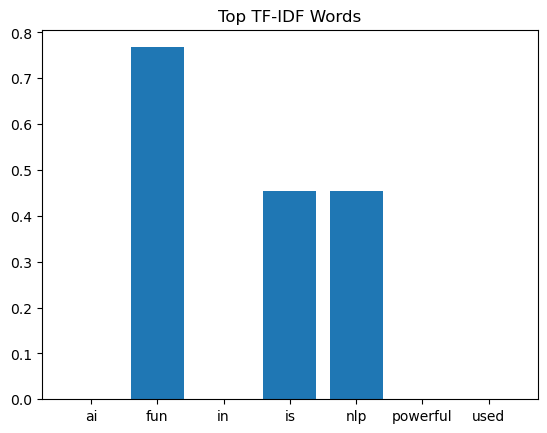

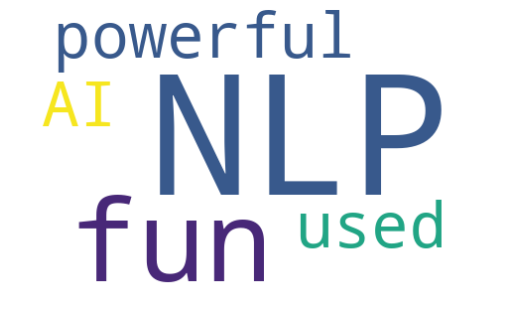

In [4]:
# Q3: Vectorization and Visualization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

corpus = ["NLP is fun", "NLP is powerful", "NLP is used in AI"]

# CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(corpus)
print("Count Vectorizer Vocabulary:", cv.get_feature_names_out())
print("Count Matrix:\n", cv_matrix.toarray())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
print("\nTF-IDF Vocabulary:", tfidf.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

# Bar Chart for TF-IDF (for first document)
word_scores = dict(zip(tfidf.get_feature_names_out(), tfidf_matrix.toarray()[0]))
plt.bar(word_scores.keys(), word_scores.values())
plt.title("Top TF-IDF Words")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=500, height=300, background_color="white").generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Vector for 'language': [ 0.00018913  0.00615464 -0.01362529 -0.00275093  0.01533716  0.01469282
 -0.00734659  0.0052854  -0.01663426  0.01241097 -0.00927464 -0.00632821
  0.01862271  0.00174677  0.01498141 -0.01214813  0.01032101  0.01984565
 -0.01691478 -0.01027138 -0.01412967 -0.0097253  -0.00755713 -0.0170724
  0.01591121 -0.00968788  0.01684723  0.01052514 -0.01310005  0.00791574
  0.0109403  -0.01485307 -0.01481144 -0.00495046 -0.01725145 -0.00316314
 -0.00080687  0.00659937  0.00288376 -0.00176284 -0.01118812  0.00346073
 -0.00179474  0.01358738  0.00794718  0.00905894  0.00286861 -0.00539971
 -0.00873363 -0.00206415]
Most similar to 'language': [('nlp', 0.16563551127910614), ('artificial', 0.12486253678798676), ('natural', 0.10232098400592804), ('intelligence', -0.11821281164884567), ('processing', -0.20600517094135284)]
Vector for 'processing': [-9.3513634e-04  1.9675351e-03  1.3423644e-04  1.1902857e-03
  1.7777059e-03  4.3529202e-03 -1.2909870e-03  2.7977999e-03
 -2.1649220e-

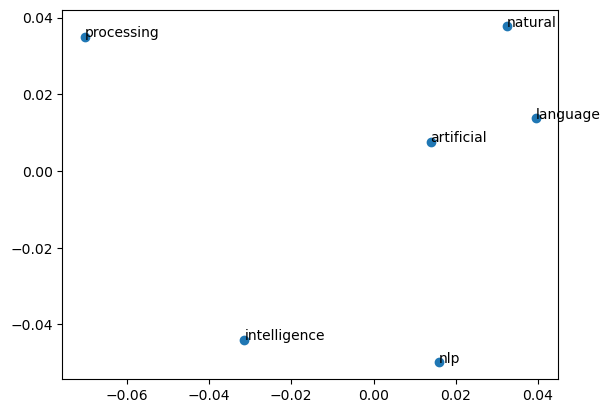

In [5]:
# Q4: Word Embeddings and Visualization
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# example sentences
sentences = [["natural", "language", "processing", "nlp", "artificial", "intelligence"]]

# Word2Vec (CBOW)
w2v_model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)
print("Vector for 'language':", w2v_model.wv['language'])
print("Most similar to 'language':", w2v_model.wv.most_similar('language'))

# FastText
ft_model = FastText(sentences, vector_size=50, window=3, min_count=1)
print("Vector for 'processing':", ft_model.wv['processing'])

# PCA Visualization
X = w2v_model.wv[w2v_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(w2v_model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


In [6]:
# Q5: Similarity Measures and Execution Time
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time
from gensim.models import Word2Vec

# training sample
sentences = [["natural", "language", "processing", "nlp", "artificial", "intelligence"]]
w2v_model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)

start = time.time()

# cosine similarity
word1, word2 = "language", "processing"
similarity = cosine_similarity([w2v_model.wv[word1]], [w2v_model.wv[word2]])
print("Cosine Similarity:", similarity[0][0])

# jaccard similarity
set1 = set("NLP is fun".split())
set2 = set("NLP is powerful".split())
jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

# euclidean distance
euclidean = np.linalg.norm(w2v_model.wv[word1] - w2v_model.wv[word2])
print("Euclidean Distance:", euclidean)

end = time.time()
print("Execution Time:", end - start, "seconds")


Cosine Similarity: -0.20600519
Jaccard Similarity: 0.5
Euclidean Distance: 0.123092145
Execution Time: 0.0022780895233154297 seconds
